## **SCORING - Soluble Epoxide Hydrolase**
#### **Micha Birklbauer 2021-07-05**

In [1]:
import os
from shutil import copyfile
copyfile("../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrophobic_Interaction:PHE387A,Hydrogen_Bond:TYR466A,Hydrogen_Bond:TRP336A,Salt_Bridge:HIS524A,Hydrophobic_Interaction:ASN472A,Hydrogen_Bond:ASN472A,Water_Bridge:ALA365A,Pi-Cation_Interaction:HIS524A,...,Water_Bridge:PHE267A,Hydrophobic_Interaction:PRO371A,Hydrophobic_Interaction:LEU428A,Hydrophobic_Interaction:ALA365A,Hydrogen_Bond:LEU408A,Hydrogen_Bond:TYR383A,Hydrogen_Bond:TYR343A,Hydrophobic_Interaction:HIS524A,Halogen_Bond:ASN472A,LABEL
0,1,IA_147.cdx|SeH_inactivess_minimized|sdf|48,1,1,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,1,inactive
1,2,IA_10|SeH_inactivess_minimized|sdf|1,0,1,0,1,0,0,0,0,...,2,0,0,0,0,2,0,0,0,inactive
2,3,A_103|SEH_inhibs_minimized|sdf|5,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,active
3,4,A_76|SEH_inhibs_minimized|sdf|46,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,active
4,5,IA_12|SeH_inactivess_minimized|sdf|22,0,1,0,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,inactive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,A_21|SEH_inhibs_minimized|sdf|20,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,active
146,147,IA_51.cdx|SeH_inactivess_minimized|sdf|136,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
147,148,IA_179.cdx|SeH_inactivess_minimized|sdf|80,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
148,149,IA_70.cdx|SeH_inactivess_minimized|sdf|148,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(150, 78) 39


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(38, 78) 8


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(48, 78) 11


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrophobic_Interaction:LEU499A,0.280665,0.641026,0.360360
1,2,Hydrophobic_Interaction:TYR383A,0.252945,0.487179,0.234234
2,3,Hydrophobic_Interaction:TRP525A,0.211365,0.589744,0.378378
3,4,Hydrophobic_Interaction:TYR466A,0.198198,0.666667,0.468468
4,5,Hydrogen_Bond:TYR383A,0.176715,0.102564,0.279279
...,...,...,...,...,...
70,71,Halogen_Bond:ASP496A,0.007623,0.025641,0.018018
71,72,Hydrogen_Bond:LEU408A,0.007623,0.025641,0.018018
72,73,Halogen_Bond:ASN472A,0.007623,0.025641,0.018018
73,74,Hydrophobic_Interaction:PHE387A,0.006237,0.051282,0.045045


#### **Extract relevant features:**

In [10]:
features_filtered = get_relevant_features(features)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrophobic_Interaction:LEU499A,0.280665,0.641026,0.360360
1,2,Hydrophobic_Interaction:TYR383A,0.252945,0.487179,0.234234
2,3,Hydrophobic_Interaction:TRP525A,0.211365,0.589744,0.378378
3,4,Hydrophobic_Interaction:TYR466A,0.198198,0.666667,0.468468
4,5,Hydrogen_Bond:TYR383A,0.176715,0.102564,0.279279
5,6,Hydrophobic_Interaction:TRP336A,0.169092,0.871795,0.702703
7,8,Hydrophobic_Interaction:HIS524A,0.159390,0.384615,0.225225
8,9,Hydrogen_Bond:ASP335A,0.121275,0.743590,0.864865
11,12,Hydrophobic_Interaction:THR360A,0.105336,0.384615,0.279279
13,14,Hydrogen_Bond:TYR466A,0.101178,1.128205,1.027027


In [11]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [12]:
positives, negatives = get_feature_impact(features_filtered)

In [13]:
positives

['Hydrophobic_Interaction:LEU499A',
 'Hydrophobic_Interaction:TYR383A',
 'Hydrophobic_Interaction:TRP525A',
 'Hydrophobic_Interaction:TYR466A',
 'Hydrophobic_Interaction:TRP336A',
 'Hydrophobic_Interaction:HIS524A',
 'Hydrophobic_Interaction:THR360A',
 'Hydrogen_Bond:TYR466A',
 'Pi-Stacking:HIS524A',
 'Hydrogen_Bond:HIS524A',
 'Hydrophobic_Interaction:PHE267A',
 'Hydrophobic_Interaction:VAL498A',
 'Hydrophobic_Interaction:PRO371A']

In [14]:
negatives

['Hydrogen_Bond:TYR383A',
 'Hydrogen_Bond:ASP335A',
 'Hydrophobic_Interaction:MET339A',
 'Hydrogen_Bond:GLN384A']

#### **Score Compounds with different strategies & save results:**

In [15]:
# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
# train_result_strat1_sorted.to_csv("train_scores1.csv")
# train_result_strat2_sorted.to_csv("train_scores2.csv")
# train_result_strat3_sorted.to_csv("train_scores3.csv")
# train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [16]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [7, 0.7866666666666666] 
Strategy 2:  [8, 0.7666666666666667] 
Strategy 3:  [6, 0.82] 
Strategy 4:  [8, 0.7733333333333333]


*accuracy for best cutoff:*

In [17]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 7, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 8, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 6, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 8, "accuracy")
)

Strategy 1:  0.7866666666666666 
Strategy 2:  0.7666666666666667 
Strategy 3:  0.82 
Strategy 4:  0.7733333333333333


*false positive rate for best cutoff:**false positive rate for best cutoff:*

In [18]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 7, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 8, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 6, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 8, "fpr")
)

Strategy 1:  0.09009009009009009 
Strategy 2:  0.08108108108108109 
Strategy 3:  0.04504504504504504 
Strategy 4:  0.02702702702702703


#### **Validation results:**

In [19]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

*accuracy for best cutoff:*

In [20]:
print(
"Strategy 1: ",
test_cutoff(val_result_strat1["LABEL"].to_list(), val_result_strat1["SCORE"].to_list(), 7, "accuracy"),
"\nStrategy 2: ",
test_cutoff(val_result_strat2["LABEL"].to_list(), val_result_strat2["SCORE"].to_list(), 8, "accuracy"),
"\nStrategy 3: ",
test_cutoff(val_result_strat3["LABEL"].to_list(), val_result_strat3["SCORE"].to_list(), 6, "accuracy"),
"\nStrategy 4: ",
test_cutoff(val_result_strat4["LABEL"].to_list(), val_result_strat4["SCORE"].to_list(), 8, "accuracy")
)

Strategy 1:  0.7894736842105263 
Strategy 2:  0.7894736842105263 
Strategy 3:  0.7631578947368421 
Strategy 4:  0.7894736842105263


*false positive rate for best cutoff:*

In [21]:
print(
"Strategy 1: ",
test_cutoff(val_result_strat1["LABEL"].to_list(), val_result_strat1["SCORE"].to_list(), 7, "fpr"),
"\nStrategy 2: ",
test_cutoff(val_result_strat2["LABEL"].to_list(), val_result_strat2["SCORE"].to_list(), 8, "fpr"),
"\nStrategy 3: ",
test_cutoff(val_result_strat3["LABEL"].to_list(), val_result_strat3["SCORE"].to_list(), 6, "fpr"),
"\nStrategy 4: ",
test_cutoff(val_result_strat4["LABEL"].to_list(), val_result_strat4["SCORE"].to_list(), 8, "fpr")
)

Strategy 1:  0.13333333333333333 
Strategy 2:  0.06666666666666667 
Strategy 3:  0.13333333333333333 
Strategy 4:  0.03333333333333333


#### **Quality metrics for training and validation data:**

*training data:*

In [22]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 7),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 8),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 6),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 8)
)

Strategy 1:  {'Ya': 0.6296296296296297, 'EF': 2.421652421652422, 'REF': 62.96296296296296} 
Strategy 2:  {'Ya': 0.5909090909090909, 'EF': 2.272727272727273, 'REF': 59.09090909090909} 
Strategy 3:  {'Ya': 0.7727272727272727, 'EF': 2.9720279720279716, 'REF': 77.27272727272727} 
Strategy 4:  {'Ya': 0.7272727272727273, 'EF': 2.797202797202797, 'REF': 72.72727272727273}


*validation data:*

In [23]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 7),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 8),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 6),
"\nStrategy 4: ",
get_metrics(val_result_strat4, 8)
)

Strategy 1:  {'Ya': 0.5, 'EF': 2.375, 'REF': 50.0} 
Strategy 2:  {'Ya': 0.5, 'EF': 2.375, 'REF': 50.0} 
Strategy 3:  {'Ya': 0.42857142857142855, 'EF': 2.0357142857142856, 'REF': 42.857142857142854} 
Strategy 4:  {'Ya': 0.5, 'EF': 2.375, 'REF': 50.0}


### **LOGISTIC REGRESSION**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix

#### **Format data:**

In [25]:
X_train = data_train.drop(columns = ["INDEX", "NAME", "LABEL"])[features_filtered["INTERACTION"].to_list()]
y_train = data_train["LABEL"].apply(lambda x: 1 if x == "active" else 0).values
X_val = data_val.drop(columns = ["INDEX", "NAME", "LABEL"])[features_filtered["INTERACTION"].to_list()]
y_val = data_val["LABEL"].apply(lambda x: 1 if x == "active" else 0).values

#### **Fit logistic model:**

In [26]:
lr = LogisticRegression(penalty = "elasticnet", class_weight = "balanced", solver = "saga", max_iter = 10000, l1_ratio = 0.5, verbose = 1)
lr.fit(X_train, y_train)

convergence after 50 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(class_weight='balanced', l1_ratio=0.5, max_iter=10000,
                   penalty='elasticnet', solver='saga', verbose=1)

#### **Evaluate model on training data:**

In [27]:
y_train_predicted = lr.predict(X_train)
y_train_predicted_probs = lr.predict_proba(X_train)[:,1] # see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

train_accuracy = accuracy_score(y_train, y_train_predicted)
train_auc_roc = roc_auc_score(y_train, y_train_predicted_probs)

print("Confusion matrix: \n", confusion_matrix(y_train, y_train_predicted))
print("Training AUC: ", train_auc_roc)
print("Training ACC: ", train_accuracy)

Confusion matrix: 
 [[79 32]
 [ 8 31]]
Training AUC:  0.8471933471933472
Training ACC:  0.7333333333333333


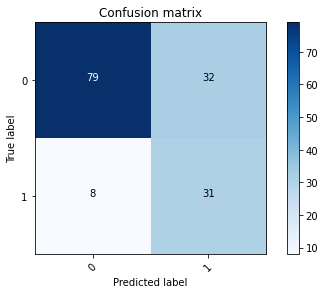

In [28]:
plot_confusion_matrix(confusion_matrix(y_train, y_train_predicted), classes = ["0", "1"]);

In [29]:
# print(classification_report(y_train, y_train_predicted, digits=6))

#### **Evaluate model on validation data:**

In [30]:
y_val_predicted = lr.predict(X_val)
y_val_predicted_probs = lr.predict_proba(X_val)[:,1] # see https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

val_accuracy = accuracy_score(y_val, y_val_predicted)
val_auc_roc = roc_auc_score(y_val, y_val_predicted_probs)

print("Confusion matrix: \n", confusion_matrix(y_val, y_val_predicted))
print("Validation AUC: ", val_auc_roc)
print("Validation ACC: ", val_accuracy)

Confusion matrix: 
 [[17 13]
 [ 3  5]]
Validation AUC:  0.6541666666666667
Validation ACC:  0.5789473684210527


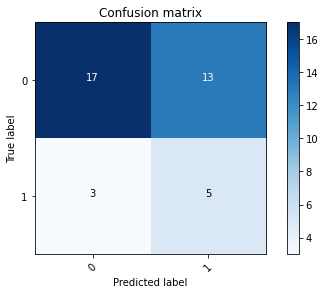

In [31]:
plot_confusion_matrix(confusion_matrix(y_val, y_val_predicted), classes = ["0", "1"]);

#### **Clean up:**

In [32]:
os.remove("scoring.py")